In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))
walk2022_filepath = "../input/walk-er-step-challenge-2022/Walker_2022.csv"
walk2022_data = pd.read_csv(walk2022_filepath, index_col="Date", parse_dates=True)
print("Setup Complete")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Setup Complete
Setup Complete


# Tail of Data 

In [2]:
walk2022_data

,Alice,Anna,Becky,Charlie,Emily,Emma,Frances,Grainne,Jane,Laurelie,Louise,Nic,Non,Ruth
Date,,,,,,,,,,,,,,
2022-01-10,6197,12663,9764.0,8051.0,8811,9674,"11,072",5287,7422,13568,20646,7084.0,6989,3379
2022-01-11,10563,1933,5656.0,5172.0,3057,6501,"5,211",6662,5993,13191,16890,5861.0,5893,4427
2022-01-12,10045,7227,10612.0,10587.0,11279,11476,"11,912",9427,7972,22311,12833,12800.0,7715,1532
2022-01-13,11546,12489,7152.0,3160.0,11575,"17,090","18,764",4290,5163,14896,20690,12812.0,10755,4872
2022-01-14,8972,1910,10665.0,2922.0,10586,"8,237","9,357",7827,7525,20653,17002,18083.0,16647,3470
2022-01-15,10482,3812,11807.0,5070.0,10442,"28,106","18,713",12109,1658,18654,20040,11932.0,4996,13874
2022-01-16,10026,4478,9241.0,6159.0,4206,"24,178","10,626",7286,11029,23142,22006,4278.0,7831,2813
2022-01-17,9026,9604,6661.0,3279.0,11930,7464,"14,497",5903,8866,10369,18145,6518.0,8680,5591
2022-01-18,10389,4077,NaN,4914.0,8539,9208,"6,061",5104,6962,14832,19211,5471.0,9194,7610


Looking at the data, I can tell taht not all the participants entered information for all the days, probably because they weren't interested enough. Most of the numbers are integers, but some are floats, so this will have to be changed in data processing.

# Line plot of Data

Text(0, 0.5, 'Steps')

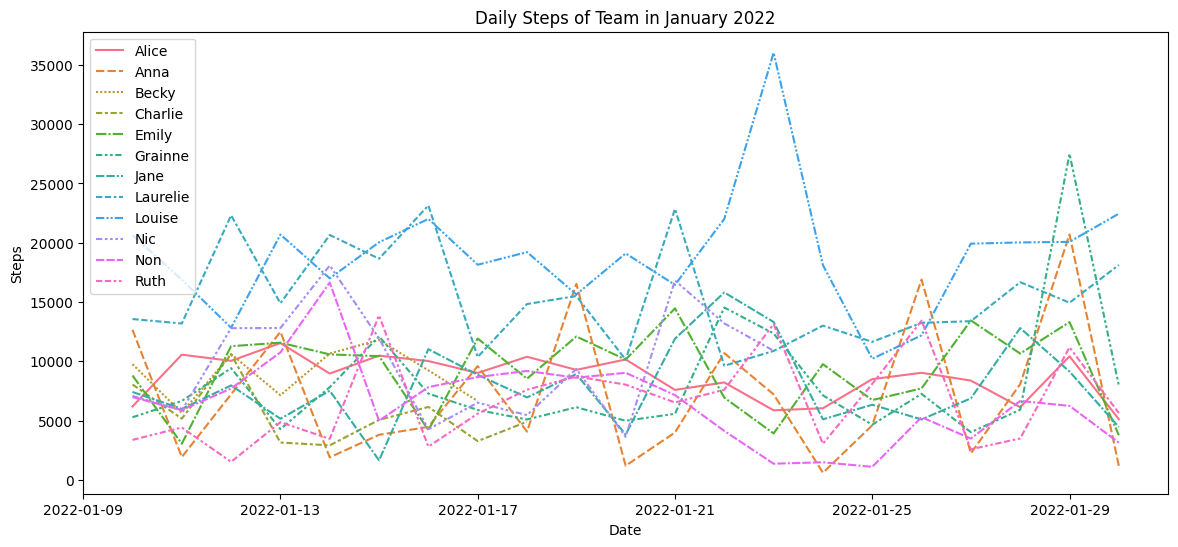

In [3]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Daily Steps of Team in January 2022")

# Line chart showing daily steps walked each day
sns.lineplot(data=walk2022_data)
#help(sns.lineplot)

plt.ylabel("Steps")

Displaying a data early will give an indicatin if there are any outliers. Here, Louise's steps for one day are significantly higher than anyone else and across her previous days' steps,  having walked the equivalent of around 18 miles. This has been independently verified with the participant,that she did do a run and a long walk this day.

# Line plot of Anna's steps

Text(0, 0.5, 'Steps')

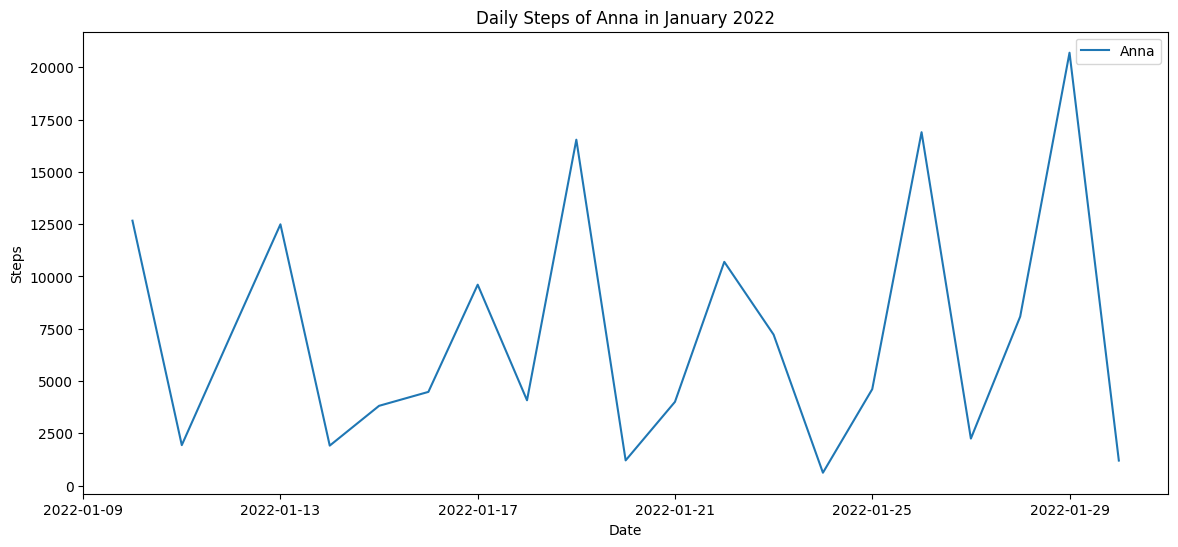

In [4]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Daily Steps of Anna in January 2022")

# Line chart showing daily steps walked each day
participant = 'Anna'
sns.lineplot(data=walk2022_data[participant], label=participant)

plt.ylabel("Steps")



Using one participant's data, there is a clear pattern repeated over the course of the days following a weekly pattern, with very low steps on some days.